# (25) model list - ```mnist```

**Motivation**: host = ```mach```, device = ```cuda:0``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
# sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from base.utils_model import load_quick
from figures.analysis import plot_convergence
from figures.imgs import plot_weights

device_idx = 0
device = f'cuda:{device_idx}'

print(f"device: {device}  ———  host: {os.uname().nodename}")

device: cuda:0  ———  host: mach

In [3]:
def _eval(seq_total: int = 1000):
    if tr.model.cfg.seq_len == 1:
        seq_total = 1
    results = tr.analysis('vld', seq_total=seq_total, n_data_batches=5, verbose=False)
    
    fig, axes = plot_convergence(results, color='C0', display=False)
    fig.suptitle(name, fontsize=16, fontfamily='monospace', color='darkgreen', y=1.1)
    display(fig)

## MNIST mlp

- Currently being fit

In [4]:
mnist_mlp = {
    '<jacob|mlp>_(64,24.0)': dict(
        model_name='',
        fit_name='',
    ),
    '<mlp|mlp>_(64,24.0)': dict(
        model_name='',
        fit_name='',
    ),
    '<jacob|mlp>_(64,32.0)': dict(
        model_name='',
        fit_name='',
    ),
    '<mlp|mlp>_(64,32.0)': dict(
        model_name='',
        fit_name='',
    ),
    '<jacob|mlp>_(16,6.0)': dict(
        model_name='',
        fit_name='',
    ),
    '<mlp|mlp>_(16,6.0)': dict(
        model_name='',
        fit_name='',
    ),
    '<jacob|mlp>_(16,8.0)': dict(
        model_name='',
        fit_name='',
    ),
    '<mlp|mlp>_(16,8.0)': dict(
        model_name='',
        fit_name='',
    ),
    '<jacob|mlp>_(4,1.5)': dict(
        model_name='',
        fit_name='',
    ),
    '<mlp|mlp>_(4,1.5)': dict(
        model_name='',
        fit_name='',
    ),
    '<jacob|mlp>_(4,2.0)': dict(
        model_name='',
        fit_name='',
    ),
    '<mlp|mlp>_(4,2.0)': dict(
        model_name='',
        fit_name='',
    ),
}
kws = dict(
    device=device,
    shuffle=False,
    strict=True,
)
mnist_mlp = {
    k: {**d, **kws} for
    k, d in mnist_mlp.items()
    if len(d['model_name']) > 0
}

In [ ]:
for name, kwargs in mnist_mlp.items():
    tr, meta = load_model(**kwargs)
    print('_' * 100)
    print(name)
    _eval()

    w = tr.model.layer.get_weight()
    norms = tonp(torch.linalg.vector_norm(w, dim=1))
    _ = tr.model.show(order=np.argsort(norms), dpi=100, pad=0)

    print('\n\n')

<jacob|mlp>_(64,24.0)

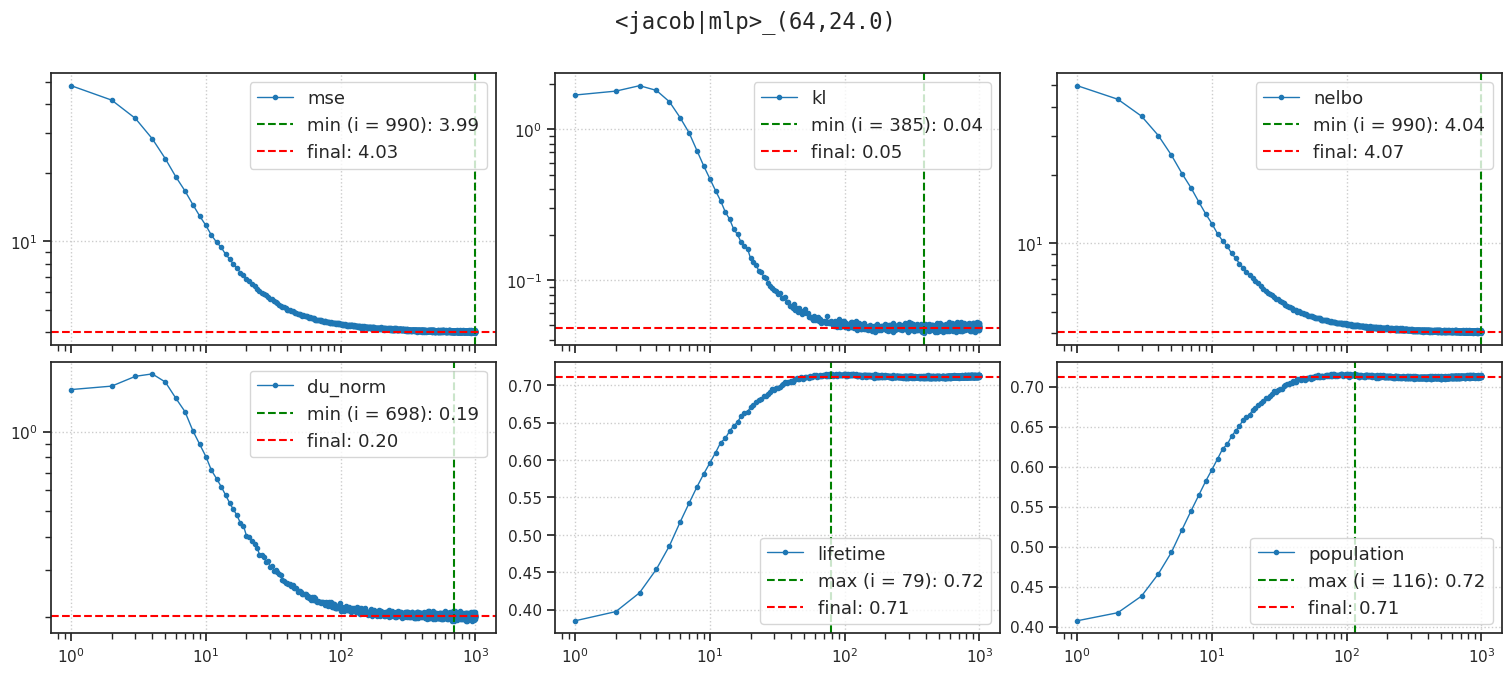

<jacob|mlp>_(64,32.0)

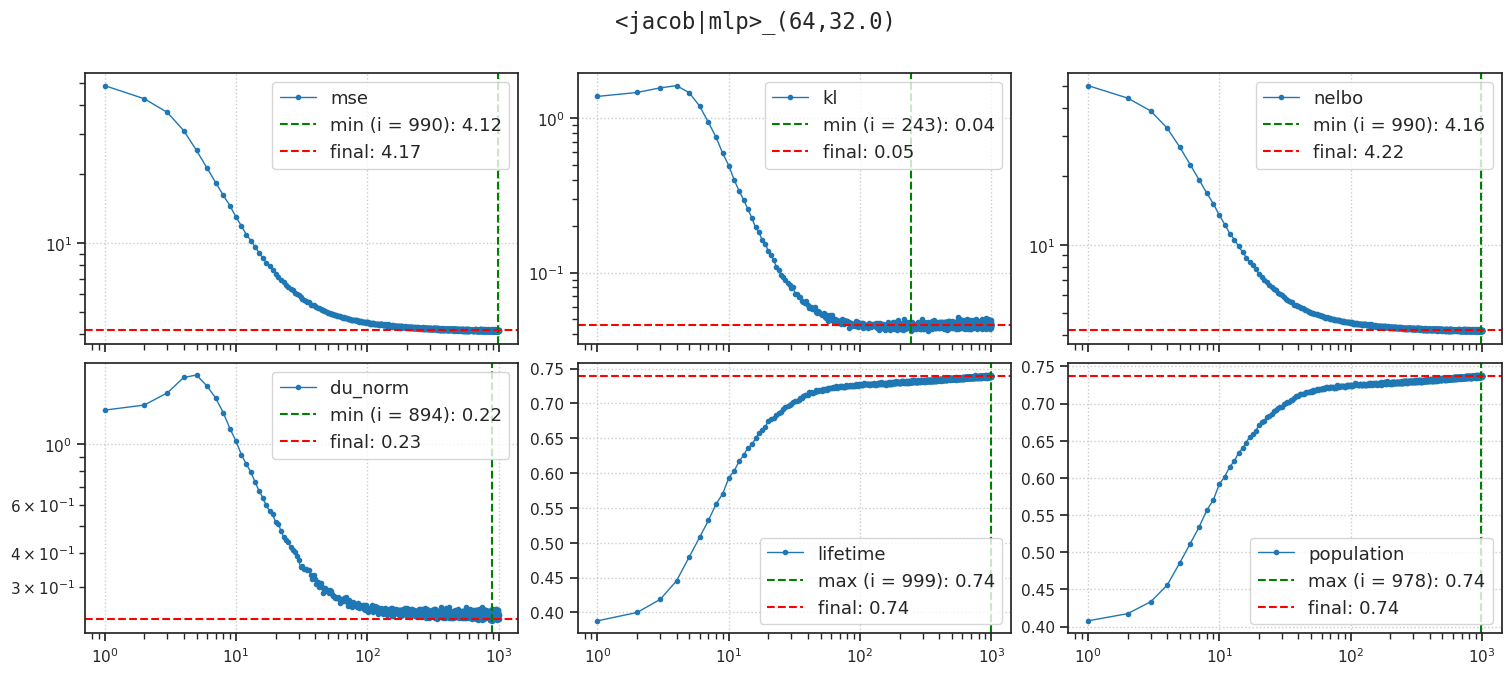

<jacob|mlp>_(32,16.0)

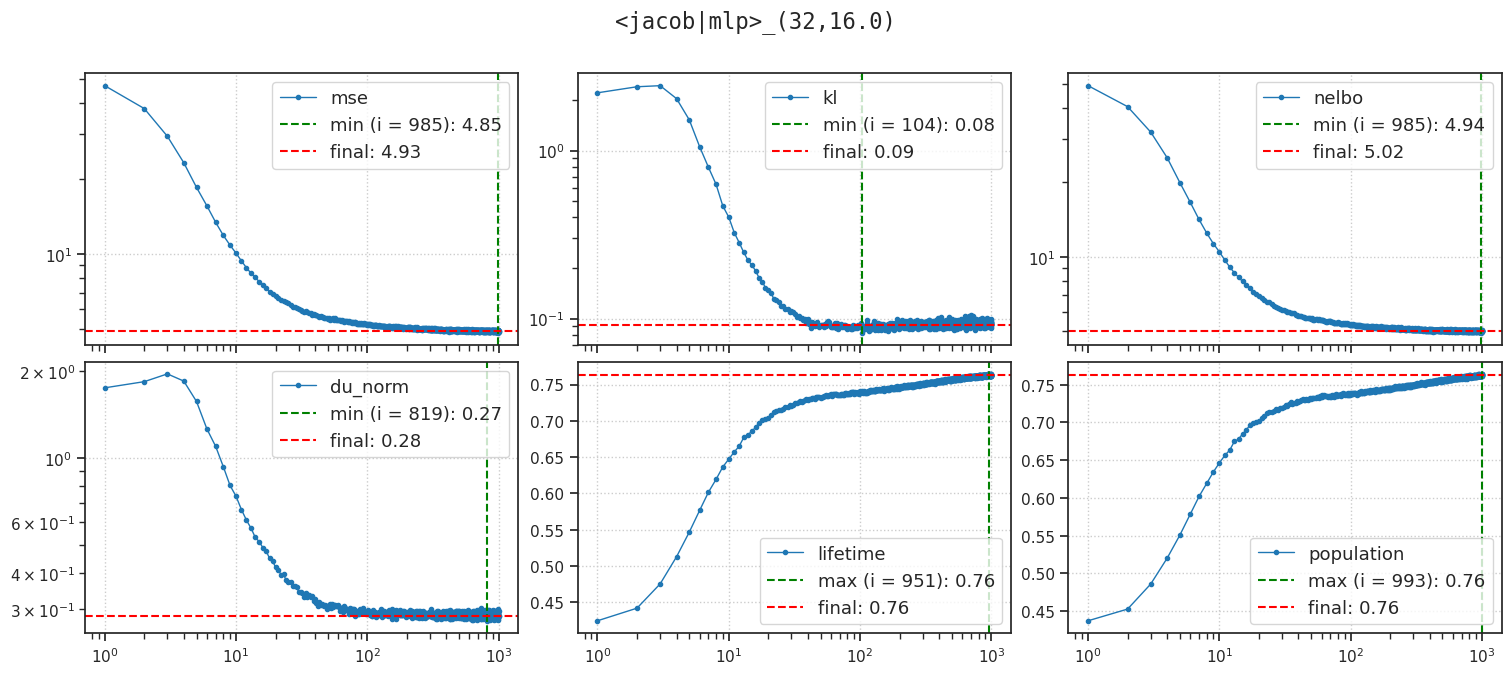

<jacob|mlp>_(4,2.0)

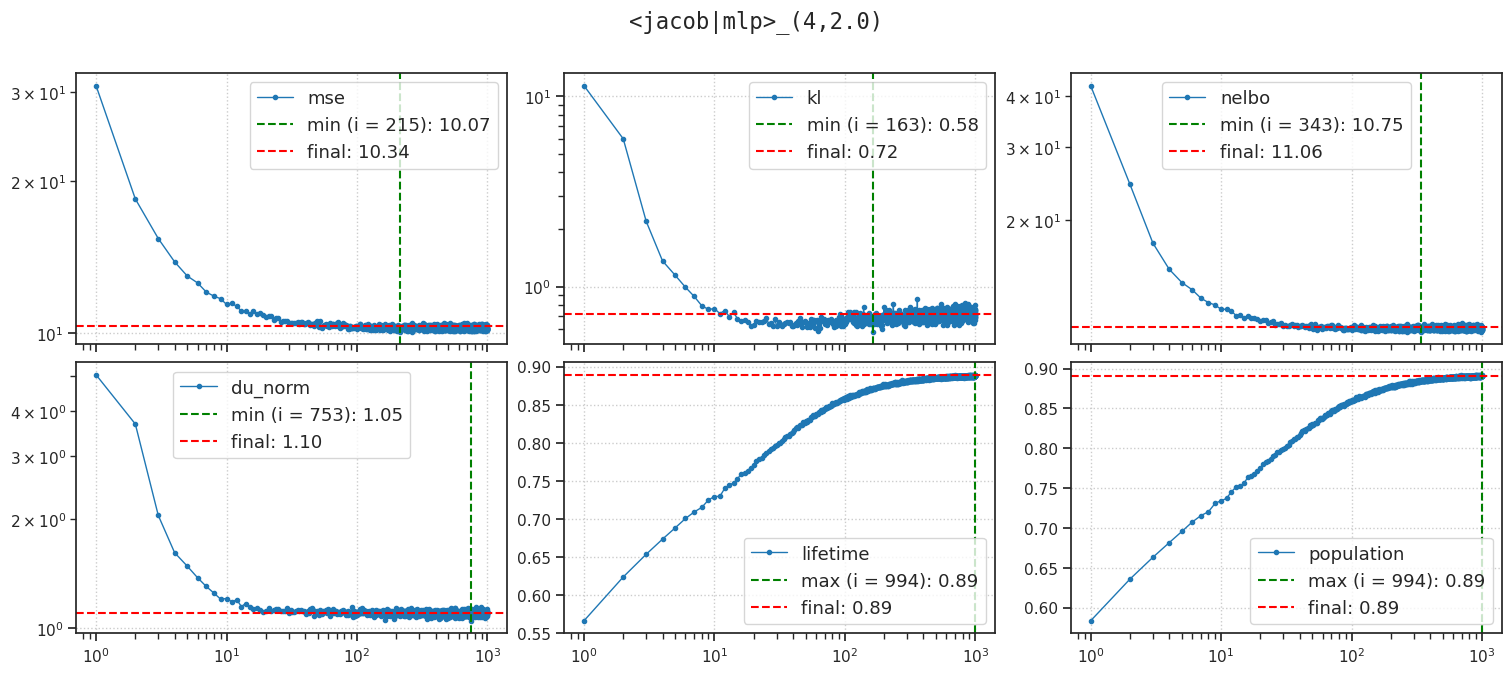

<jacob|mlp>_(2,2.0)

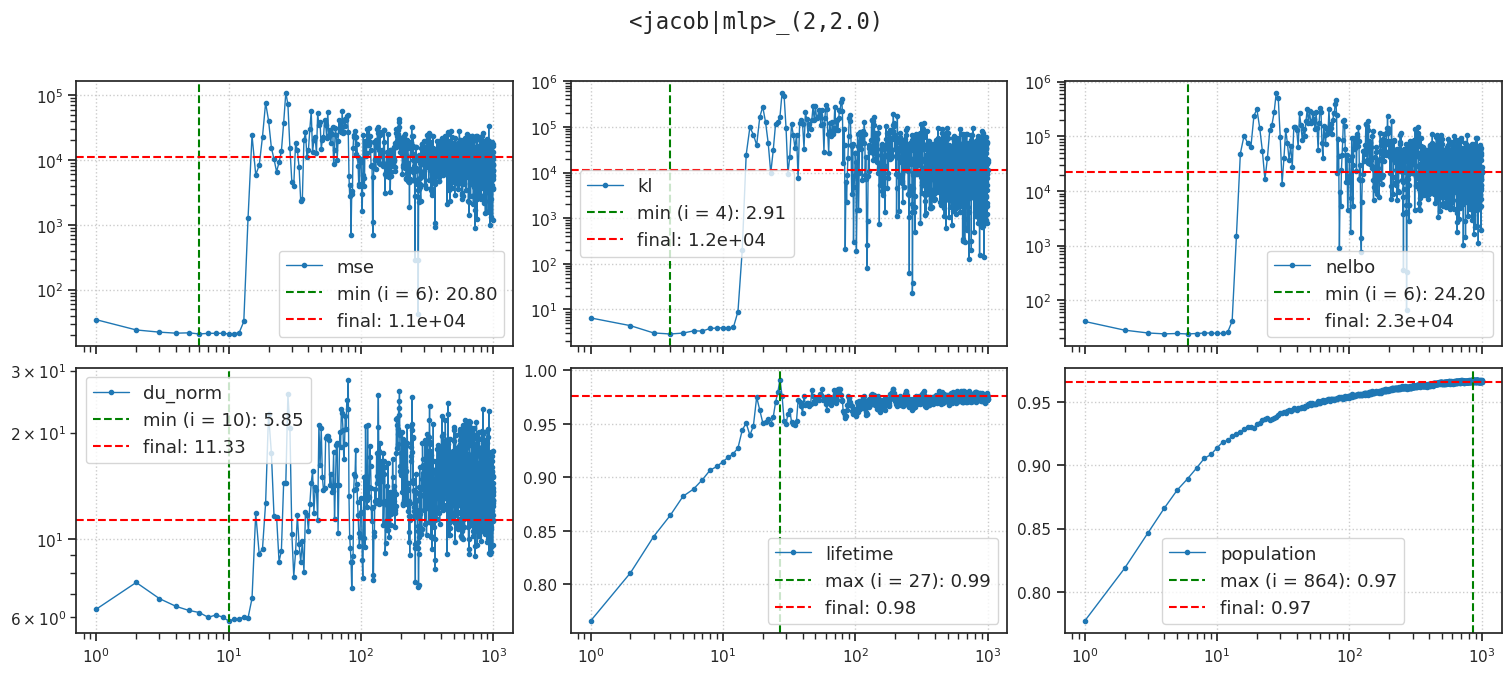

<mlp|mlp>_(1,1.0)

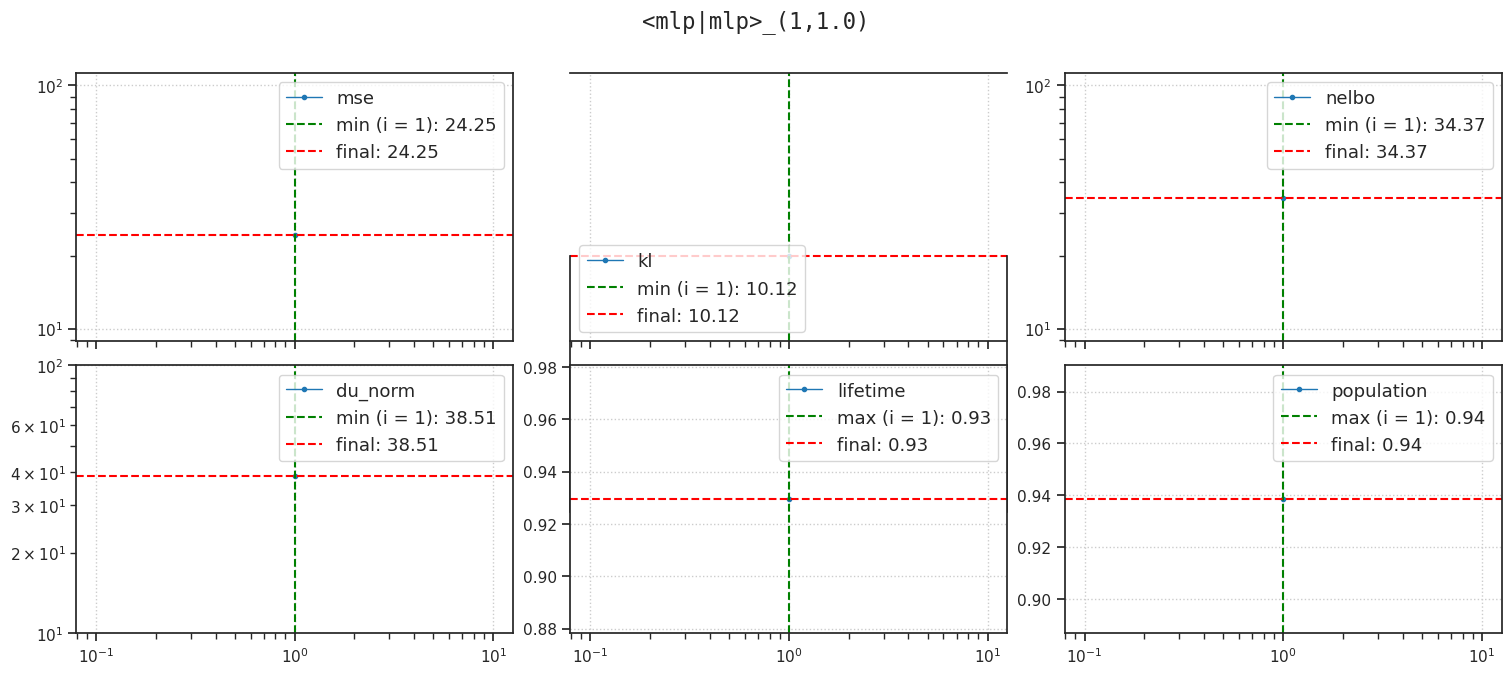

In [8]:
## Was: older fits from chewie

## MNIST conv

- Need a few more fits
- Will bring over one fit from ```solo```
- The rest are being fit on ```mach```

In [4]:
mnist_conv = {
    '<jacob|conv>_(16,6.0)': dict(
        model_name='poisson_MNIST_t-16_z-[128]_k-32_<jacob|conv>',
        fit_name='b200-ep400-lr(0.002)_beta(6:0x0.1)_temp(0.05:lin-0.5)_gr(150)_(2024_09_17,09:34)',
    ),
    '<jacob|conv>_(8,4.0)': dict(
        model_name='poisson_MNIST_t-8_z-[128]_k-32_<jacob|conv>',
        fit_name='b200-ep400-lr(0.002)_beta(4:0x0.1)_temp(0.05:lin-0.5)_gr(500)_(2024_09_16,21:07)',
    ),
    '<conv|conv>_(16,6.0)': dict(
        model_name='poisson_MNIST_t-16_z-[128]_k-32_<conv|conv>',
        fit_name='b200-ep400-lr(0.002)_beta(6:0x0.1)_temp(0.05:lin-0.5)_gr(150)_(2024_09_18,19:54)',
    ),
    '<conv|conv>_(1,1.0)': dict(
        model_name='poisson_MNIST_t-1_z-[128]_k-32_<conv|conv>',
        fit_name='b200-ep400-lr(0.002)_beta(1:0x0.1)_temp(0.05:lin-0.5)_gr(150)_(2024_09_18,19:56)',
    ),
}
kws = dict(
    device=device,
    shuffle=False,
    strict=True,
)
mnist_conv = {
    k: {**d, **kws} for
    k, d in mnist_conv.items()
    if len(d['model_name']) > 0
}

____________________________________________________________________________________________________

<jacob|conv>_(16,6.0)

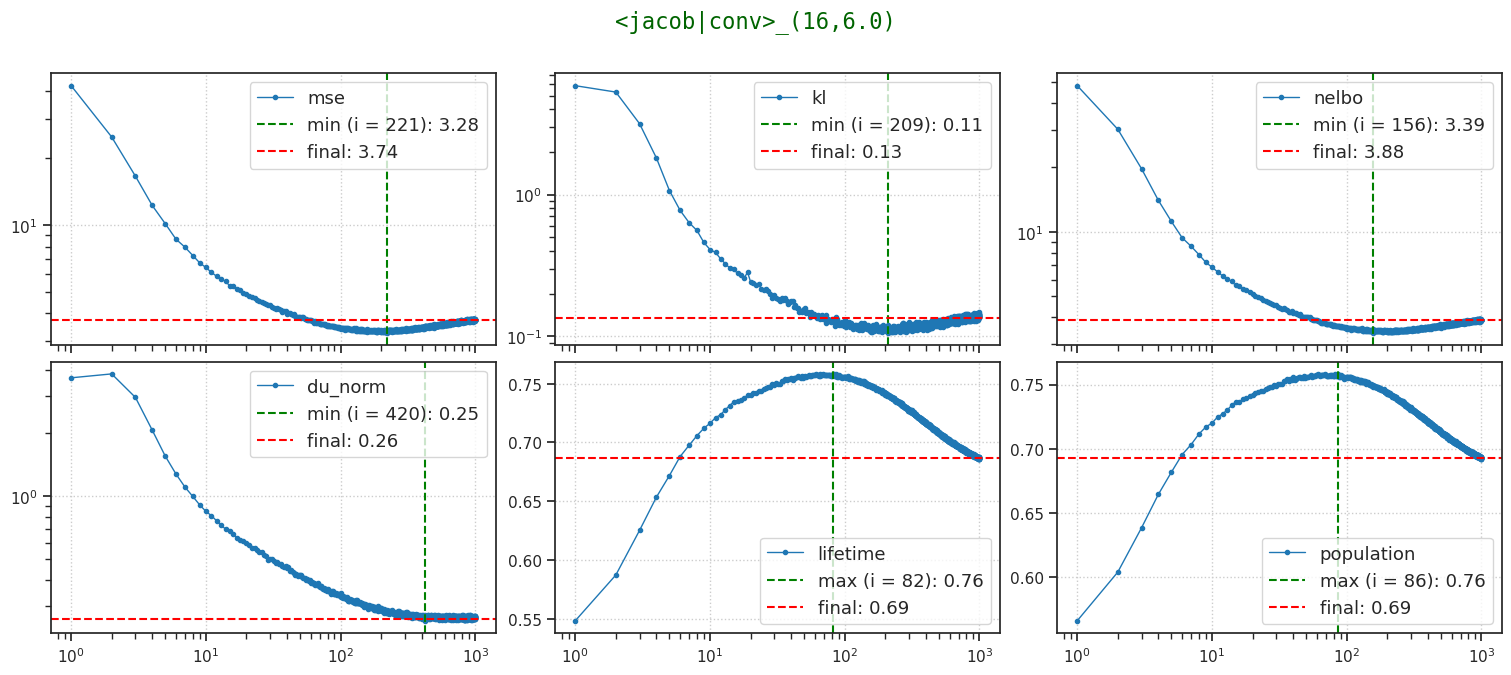

____________________________________________________________________________________________________

<jacob|conv>_(8,4.0)

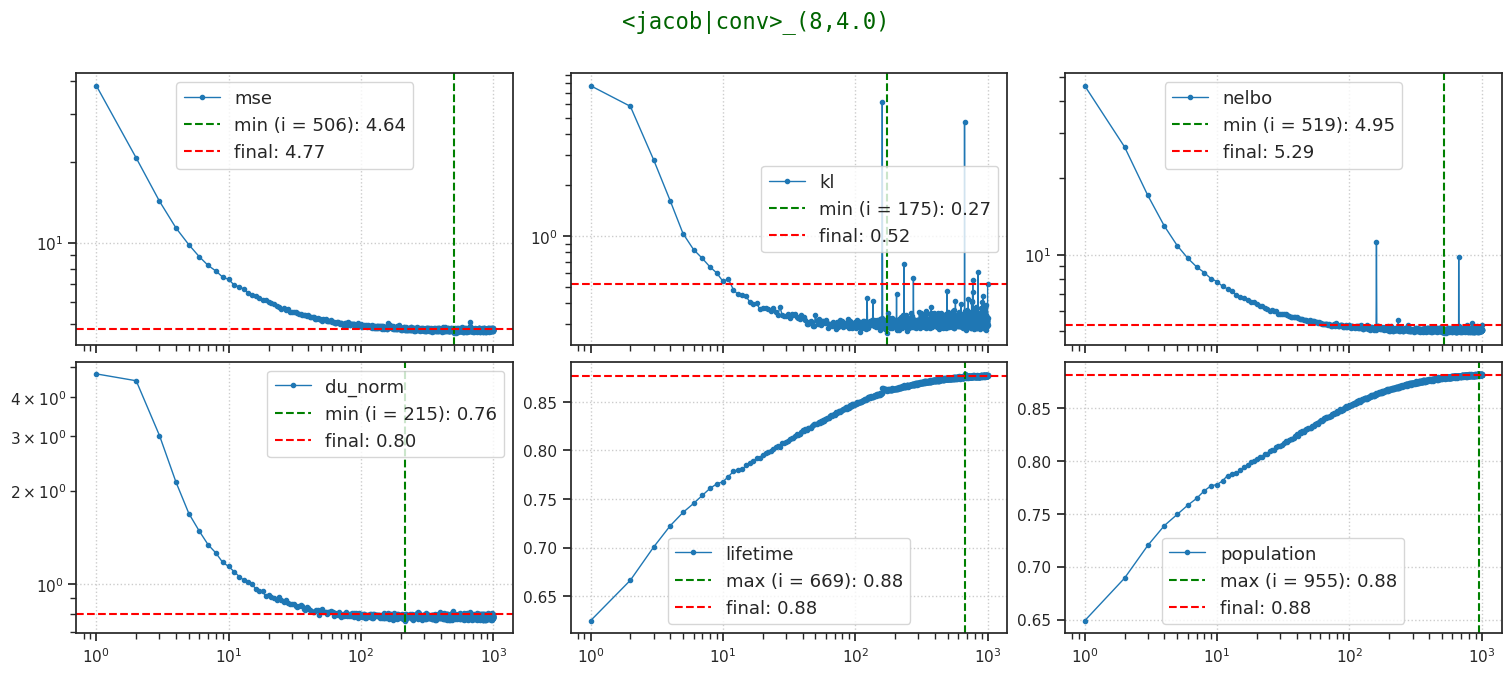

____________________________________________________________________________________________________

<conv|conv>_(16,6.0)

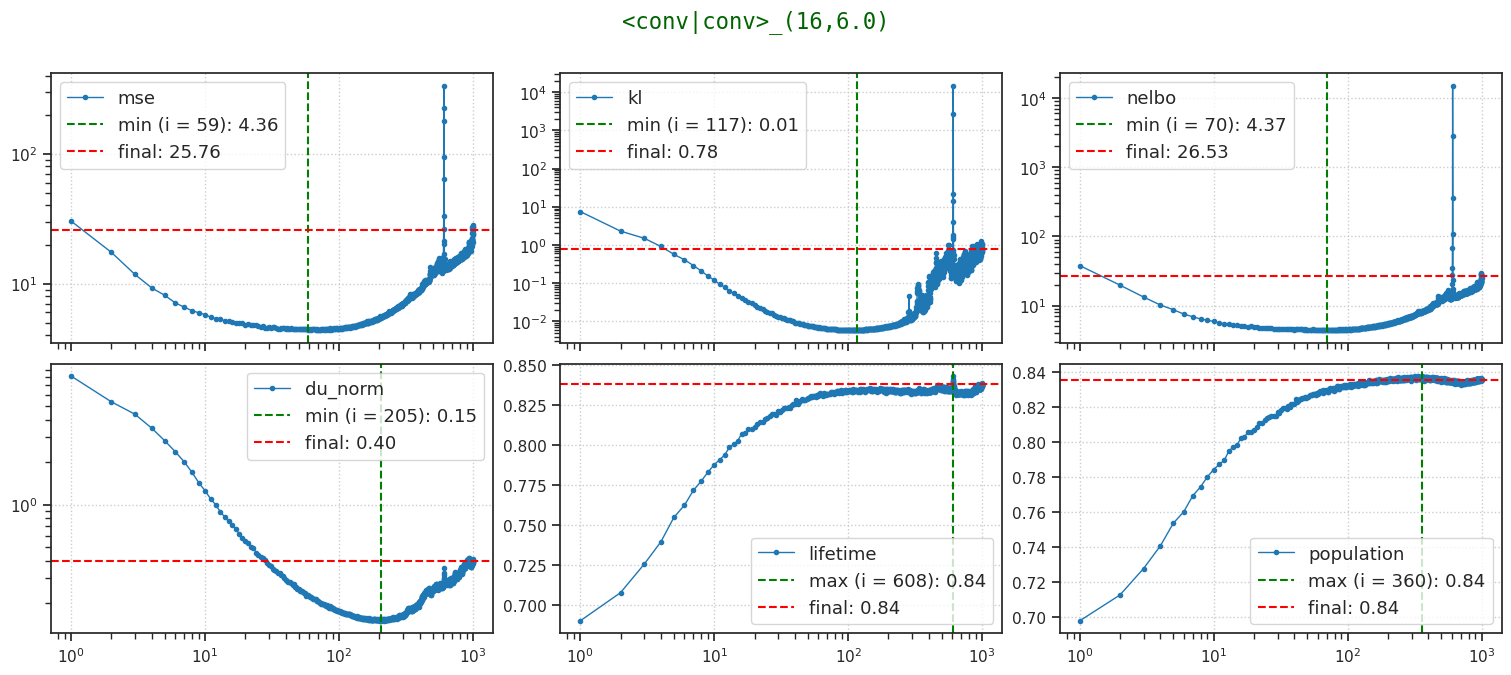

____________________________________________________________________________________________________

<conv|conv>_(1,1.0)

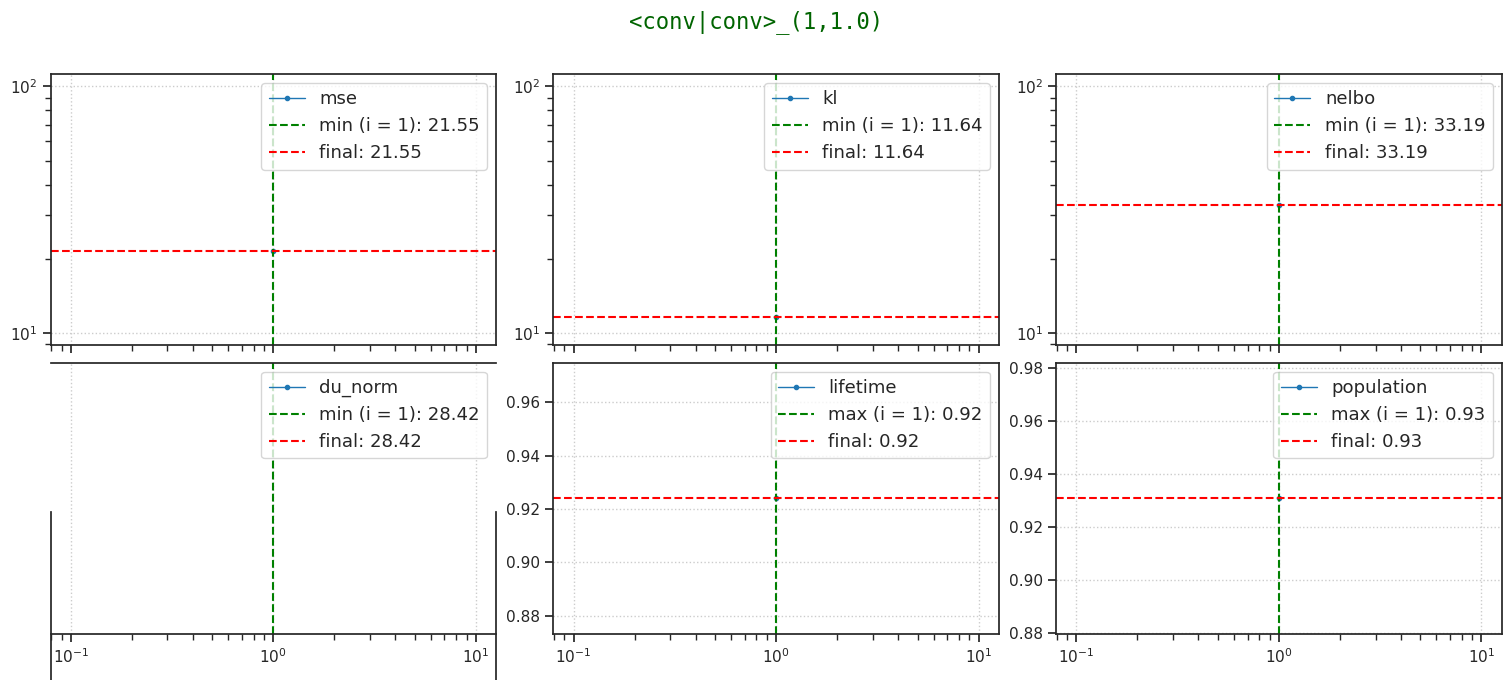

CPU times: user 7min 31s, sys: 10.4 s, total: 7min 41s
Wall time: 5min 7s


In [5]:
%%time


for name, kwargs in mnist_conv.items():
    tr, meta = load_model(**kwargs)
    print('_' * 100)
    print(name)
    _eval()
    print('\n\n')